In [57]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(r'/tf/Lecture/Covid_19_Prediction_Stacking/src/')

import pandas as pd

import datetime

from my_dataloader import  My_DataLoader


import matplotlib.pyplot as plt
import seaborn as sns
from pyplotz.pyplotz import PyplotZ #一个优化matplotlib函数操作的package
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pltz=PyplotZ()

from matplotlib.pylab import rcParams
#绘制图像的背景长高
rcParams['figure.figsize'] = 50,22
#用来正常显示中文标签
rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
rcParams['axes.unicode_minus'] = False
#所有警告只出现一次，避免警告占用太多输出页面，在进行循环时这项设置尤其有用
warnings.filterwarnings(action='once')
# 设置绘图选项:
sns.set(style="whitegrid")
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
pd.set_option("display.max_columns", 36)


/tf/.anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
dl = My_DataLoader()
dl.load_from_csv()
result_path = dl.root_path + 'result/constrained_lstm_data/'
img_path = dl.root_path + 'img/'


countries_results = {}
countries_train_losses = {}
countries_valid_losses = {}

# country = 'Russia'
# if country is not None:
for country in dl.interested_countries:
    ori_data = dl.countries_data[country]
    result_data = pd.read_csv('{}result_{}.csv'.format(result_path, country), header=None)
    result_data.columns = ['total_cases', 'total_deaths', 'total_recovered', 'total_tests']
    valid_start = ori_data[ori_data['date'] == '11/10/20'].index.values[0]
    valid_end = ori_data[ori_data['date'] == '12/10/20'].index.values[0]
    result_data['index'] = np.array(([i for i in range(valid_start, valid_end)]))
    result_data.set_index('index', inplace=True)
    train_losses = pd.read_csv('{}train_loss_{}.csv'.format(result_path, country), header=None)
    train_losses.columns=['mse_loss']
    valid_losses = pd.read_csv('{}valid_loss_{}.csv'.format(result_path, country), header=None, index_col=0)
    valid_losses.columns=['mse_loss']

    countries_results[country] = result_data
    countries_train_losses[country] = train_losses
    countries_valid_losses[country] = valid_losses

/tf/.anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# result_data
train_losses
valid_losses


,mse_loss
0,3.330366e+07
1,3.329350e+07
2,3.328327e+07
3,3.327298e+07
4,3.326272e+07
...,...
5021,3.116582e+07
5022,3.116580e+07
5023,3.116577e+07
5024,3.116575e+07


,mse_loss
0,
1.0,58680912.0
6.0,58519304.0
11.0,58359200.0
16.0,58202876.0
21.0,58049748.0
...,...
5006.0,49408060.0
5011.0,49408064.0
5016.0,49408064.0


In [60]:
def add_day_of_the_week_str(row):
    date_str = row['date'].split('/')
    year = int(date_str[2]) + 2000
    month = int(date_str[0])
    day = int(date_str[1])
    weekday_str = datetime.date(year, month, day).strftime('%a')
    # weekday = int(weekday_str)
    row['day_of_the_week_str'] = weekday_str
    return row



/tf/.anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_cases'>

Text(0.5, 1.0, 'new_cases')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_deaths'>

Text(0.5, 1.0, 'new_deaths')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_recovered'>

Text(0.5, 1.0, 'new_recovered')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_tests'>

Text(0.5, 1.0, 'new_tests')

Text(0.5, 0.98, 'the day of the week (Austria)')

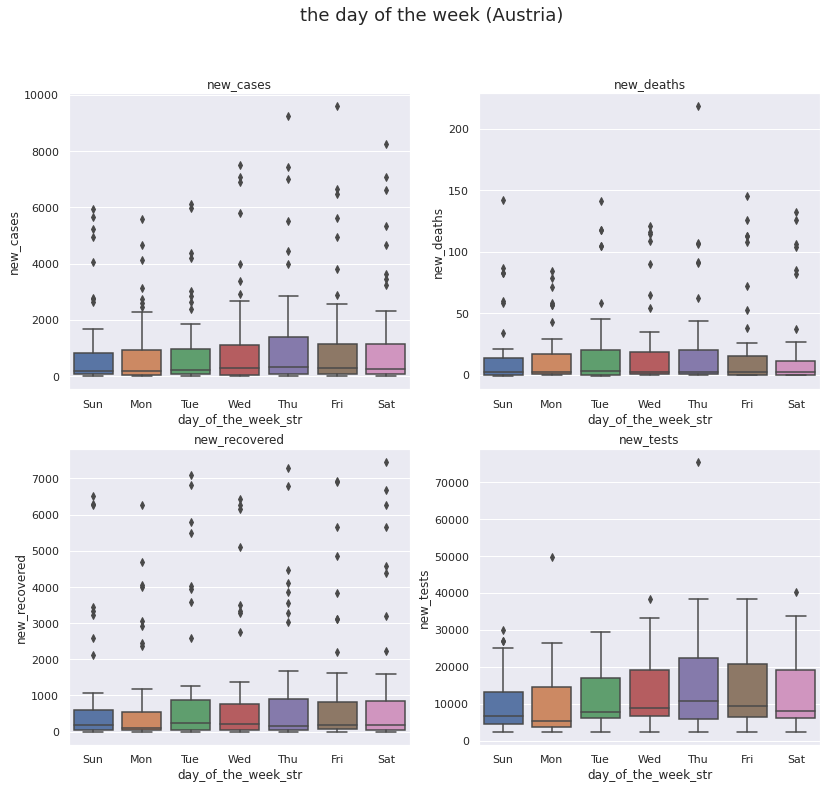

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_cases'>

Text(0.5, 1.0, 'new_cases')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_deaths'>

Text(0.5, 1.0, 'new_deaths')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_recovered'>

Text(0.5, 1.0, 'new_recovered')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_tests'>

Text(0.5, 1.0, 'new_tests')

Text(0.5, 0.98, 'the day of the week (Italy)')

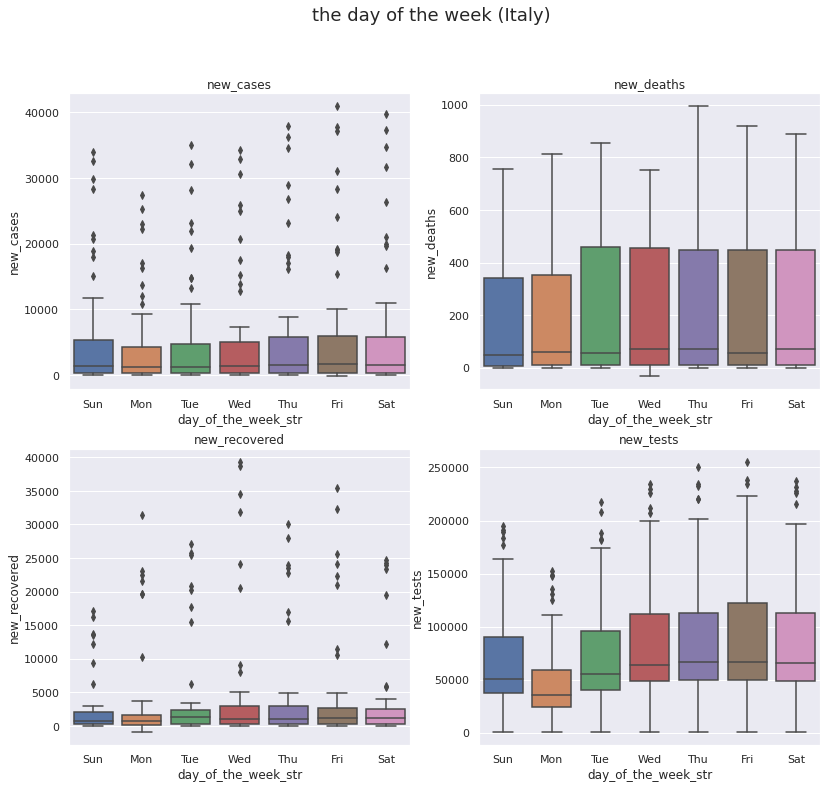

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_cases'>

Text(0.5, 1.0, 'new_cases')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_deaths'>

Text(0.5, 1.0, 'new_deaths')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_recovered'>

Text(0.5, 1.0, 'new_recovered')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_tests'>

Text(0.5, 1.0, 'new_tests')

Text(0.5, 0.98, 'the day of the week (Russia)')

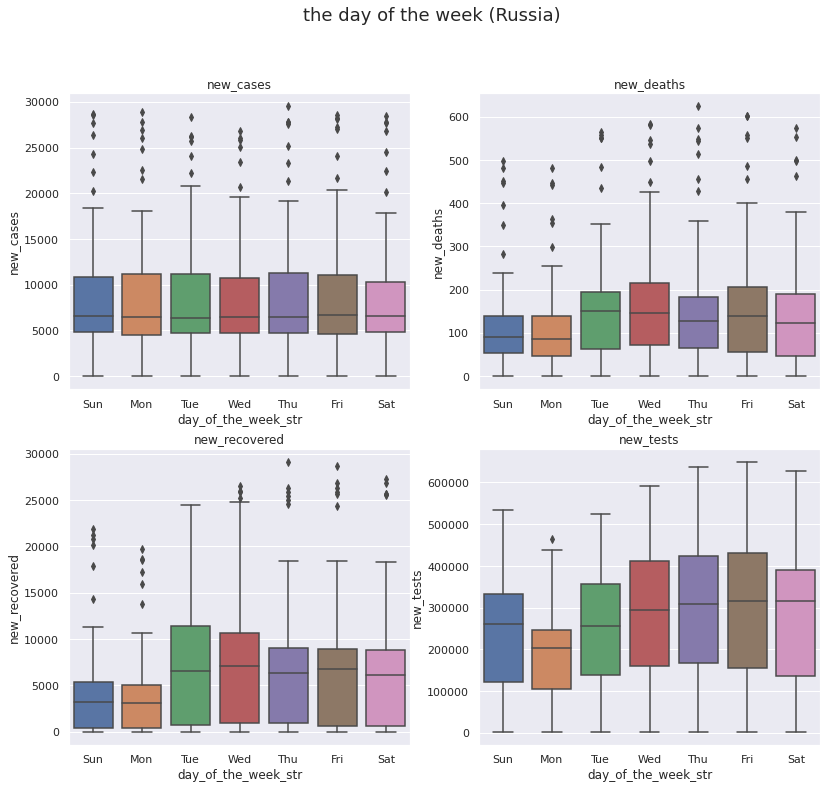

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_cases'>

Text(0.5, 1.0, 'new_cases')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_deaths'>

Text(0.5, 1.0, 'new_deaths')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_recovered'>

Text(0.5, 1.0, 'new_recovered')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_tests'>

Text(0.5, 1.0, 'new_tests')

Text(0.5, 0.98, 'the day of the week (Denmark)')

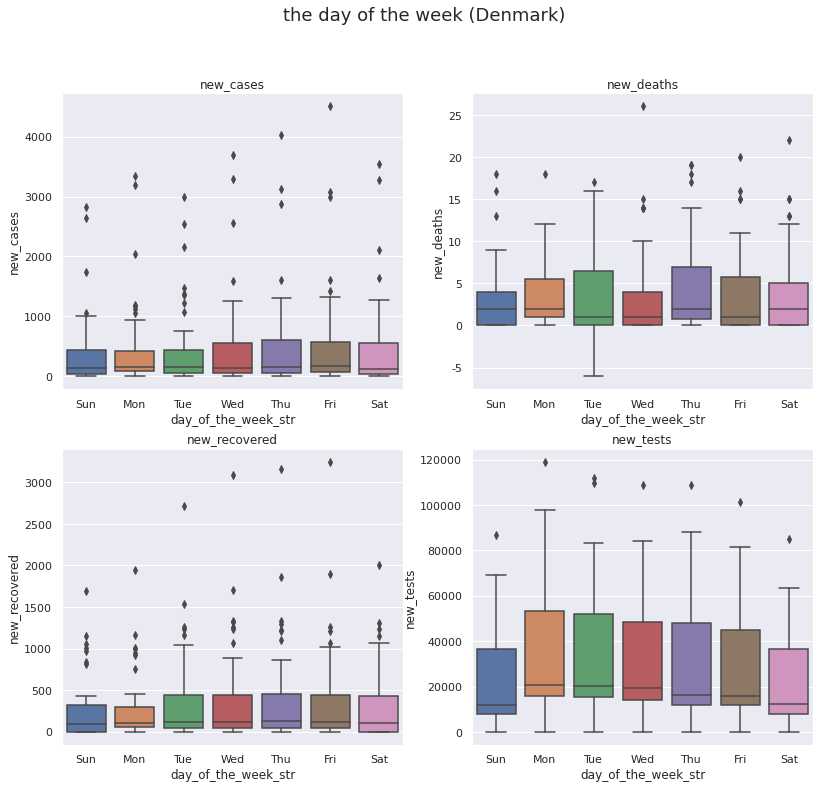

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_cases'>

Text(0.5, 1.0, 'new_cases')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_deaths'>

Text(0.5, 1.0, 'new_deaths')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_recovered'>

Text(0.5, 1.0, 'new_recovered')

<AxesSubplot:xlabel='day_of_the_week_str', ylabel='new_tests'>

Text(0.5, 1.0, 'new_tests')

Text(0.5, 0.98, 'the day of the week (Switzerland)')

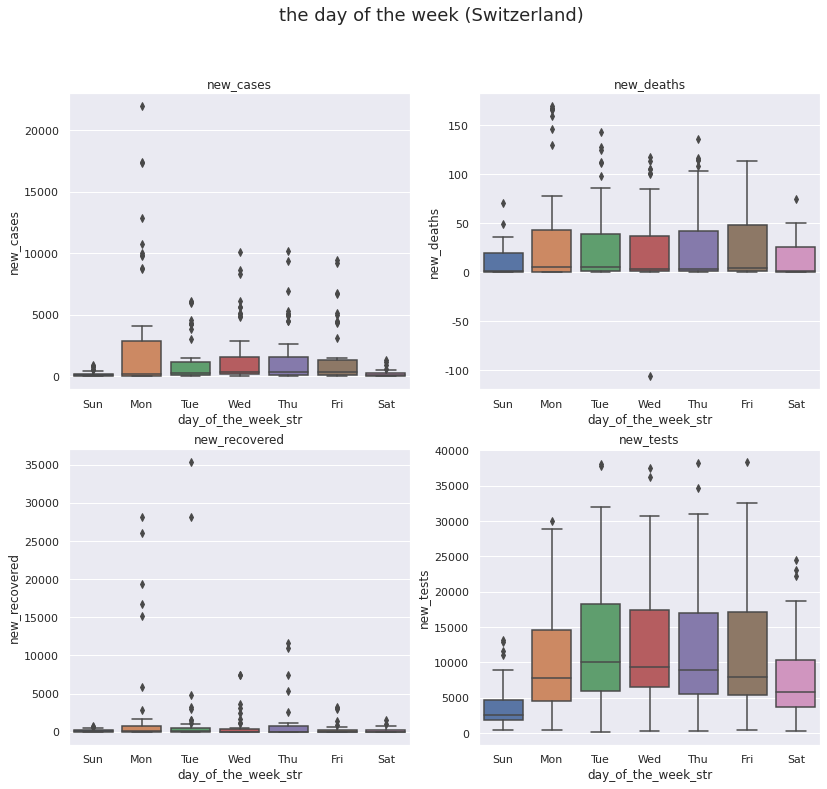

In [61]:
# country = 'Russia'
# if country is not None:
for country in dl.interested_countries:
    ori_data = dl.countries_data[country]
    ori_data['day_of_the_week_str'] = 0
    ori_data = ori_data.apply(add_day_of_the_week_str, axis=1)

    grouped = ori_data.groupby('day_of_the_week_str')
    avg_weekday_data = pd.DataFrame(np.zeros((len(grouped), ori_data.shape[1] - 2)), columns=ori_data.drop(columns=['date', 'day_of_the_week_str']).columns)
    for key, group in grouped:
        avg = group.drop(columns=['date', 'day_of_the_week_str']).mean()
        avg_weekday_data.at[key, :] = avg
    weekday_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']


    print_columns = ['new_cases', 'new_deaths', 'new_recovered', 'new_tests']
    f,ax=plt.subplots(2,2,figsize=(12,12))
    for i, col in enumerate(print_columns):
        sns.boxplot(x='day_of_the_week_str', y=col, order=weekday_order, data = ori_data, ax=ax[i // 2][i % 2])
        ax[i // 2][i % 2].set_title(col)

    plt.suptitle('the day of the week ({})'.format(country), fontsize=18)
    plt.savefig('{}the_day_of_the_week ({}).png'.format(img_path, country))
    plt.show()

/tf/.anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

Text(0.5, 0.98, 'correlation (Austria)')

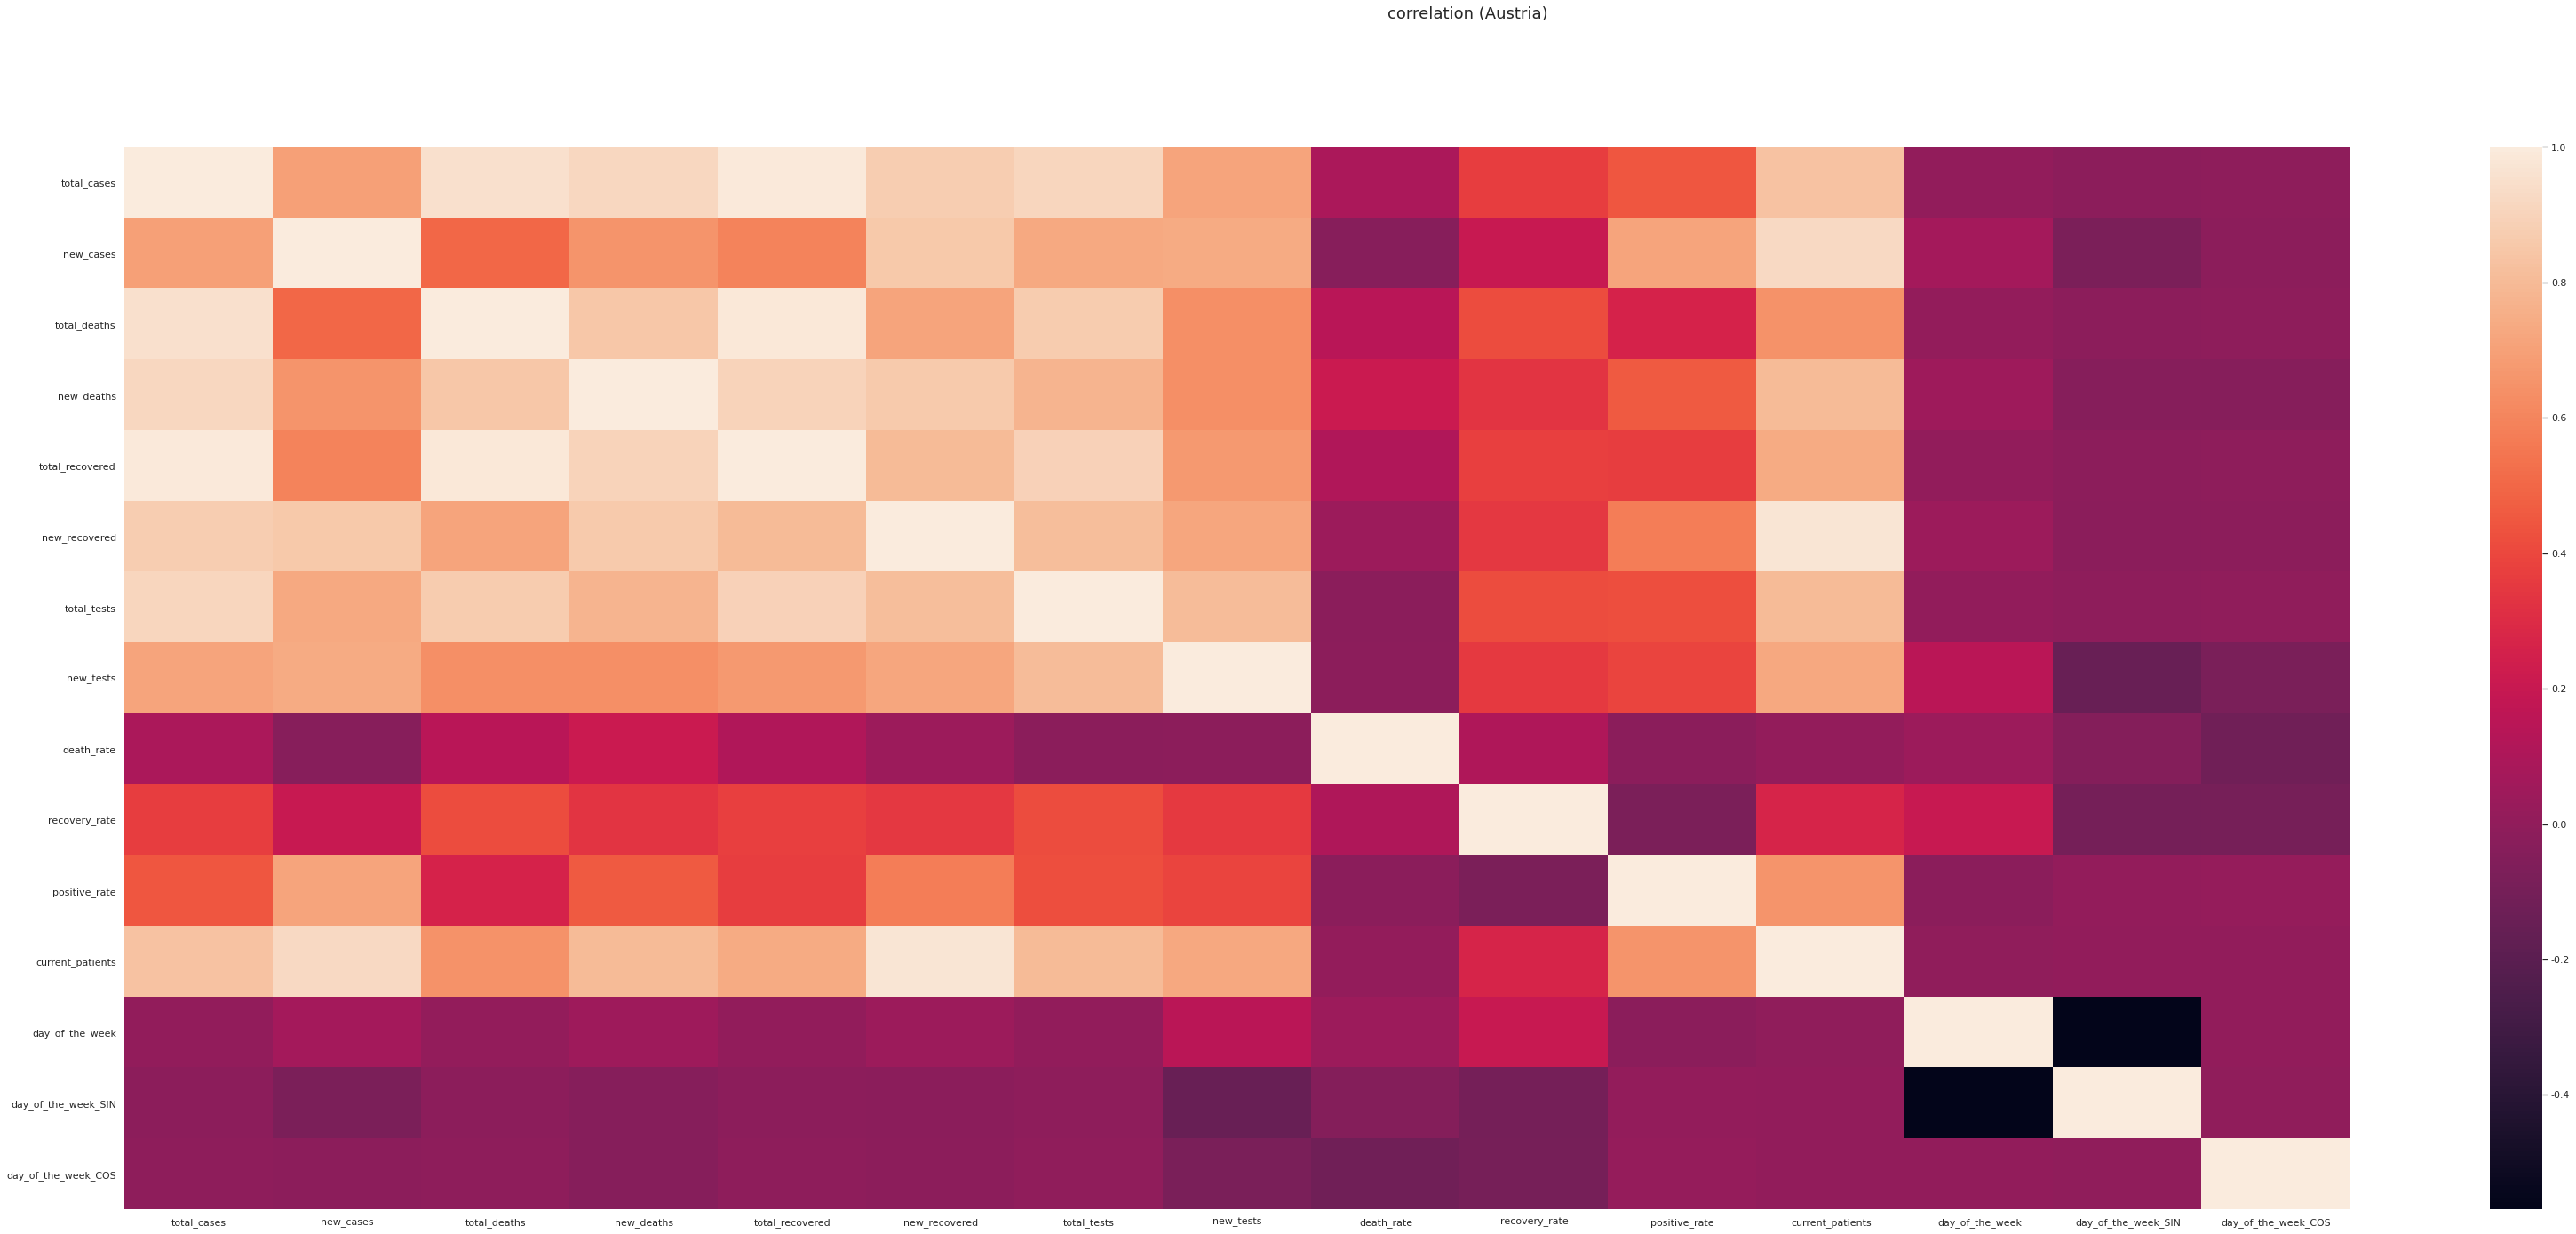

<AxesSubplot:>

Text(0.5, 0.98, 'correlation (Italy)')

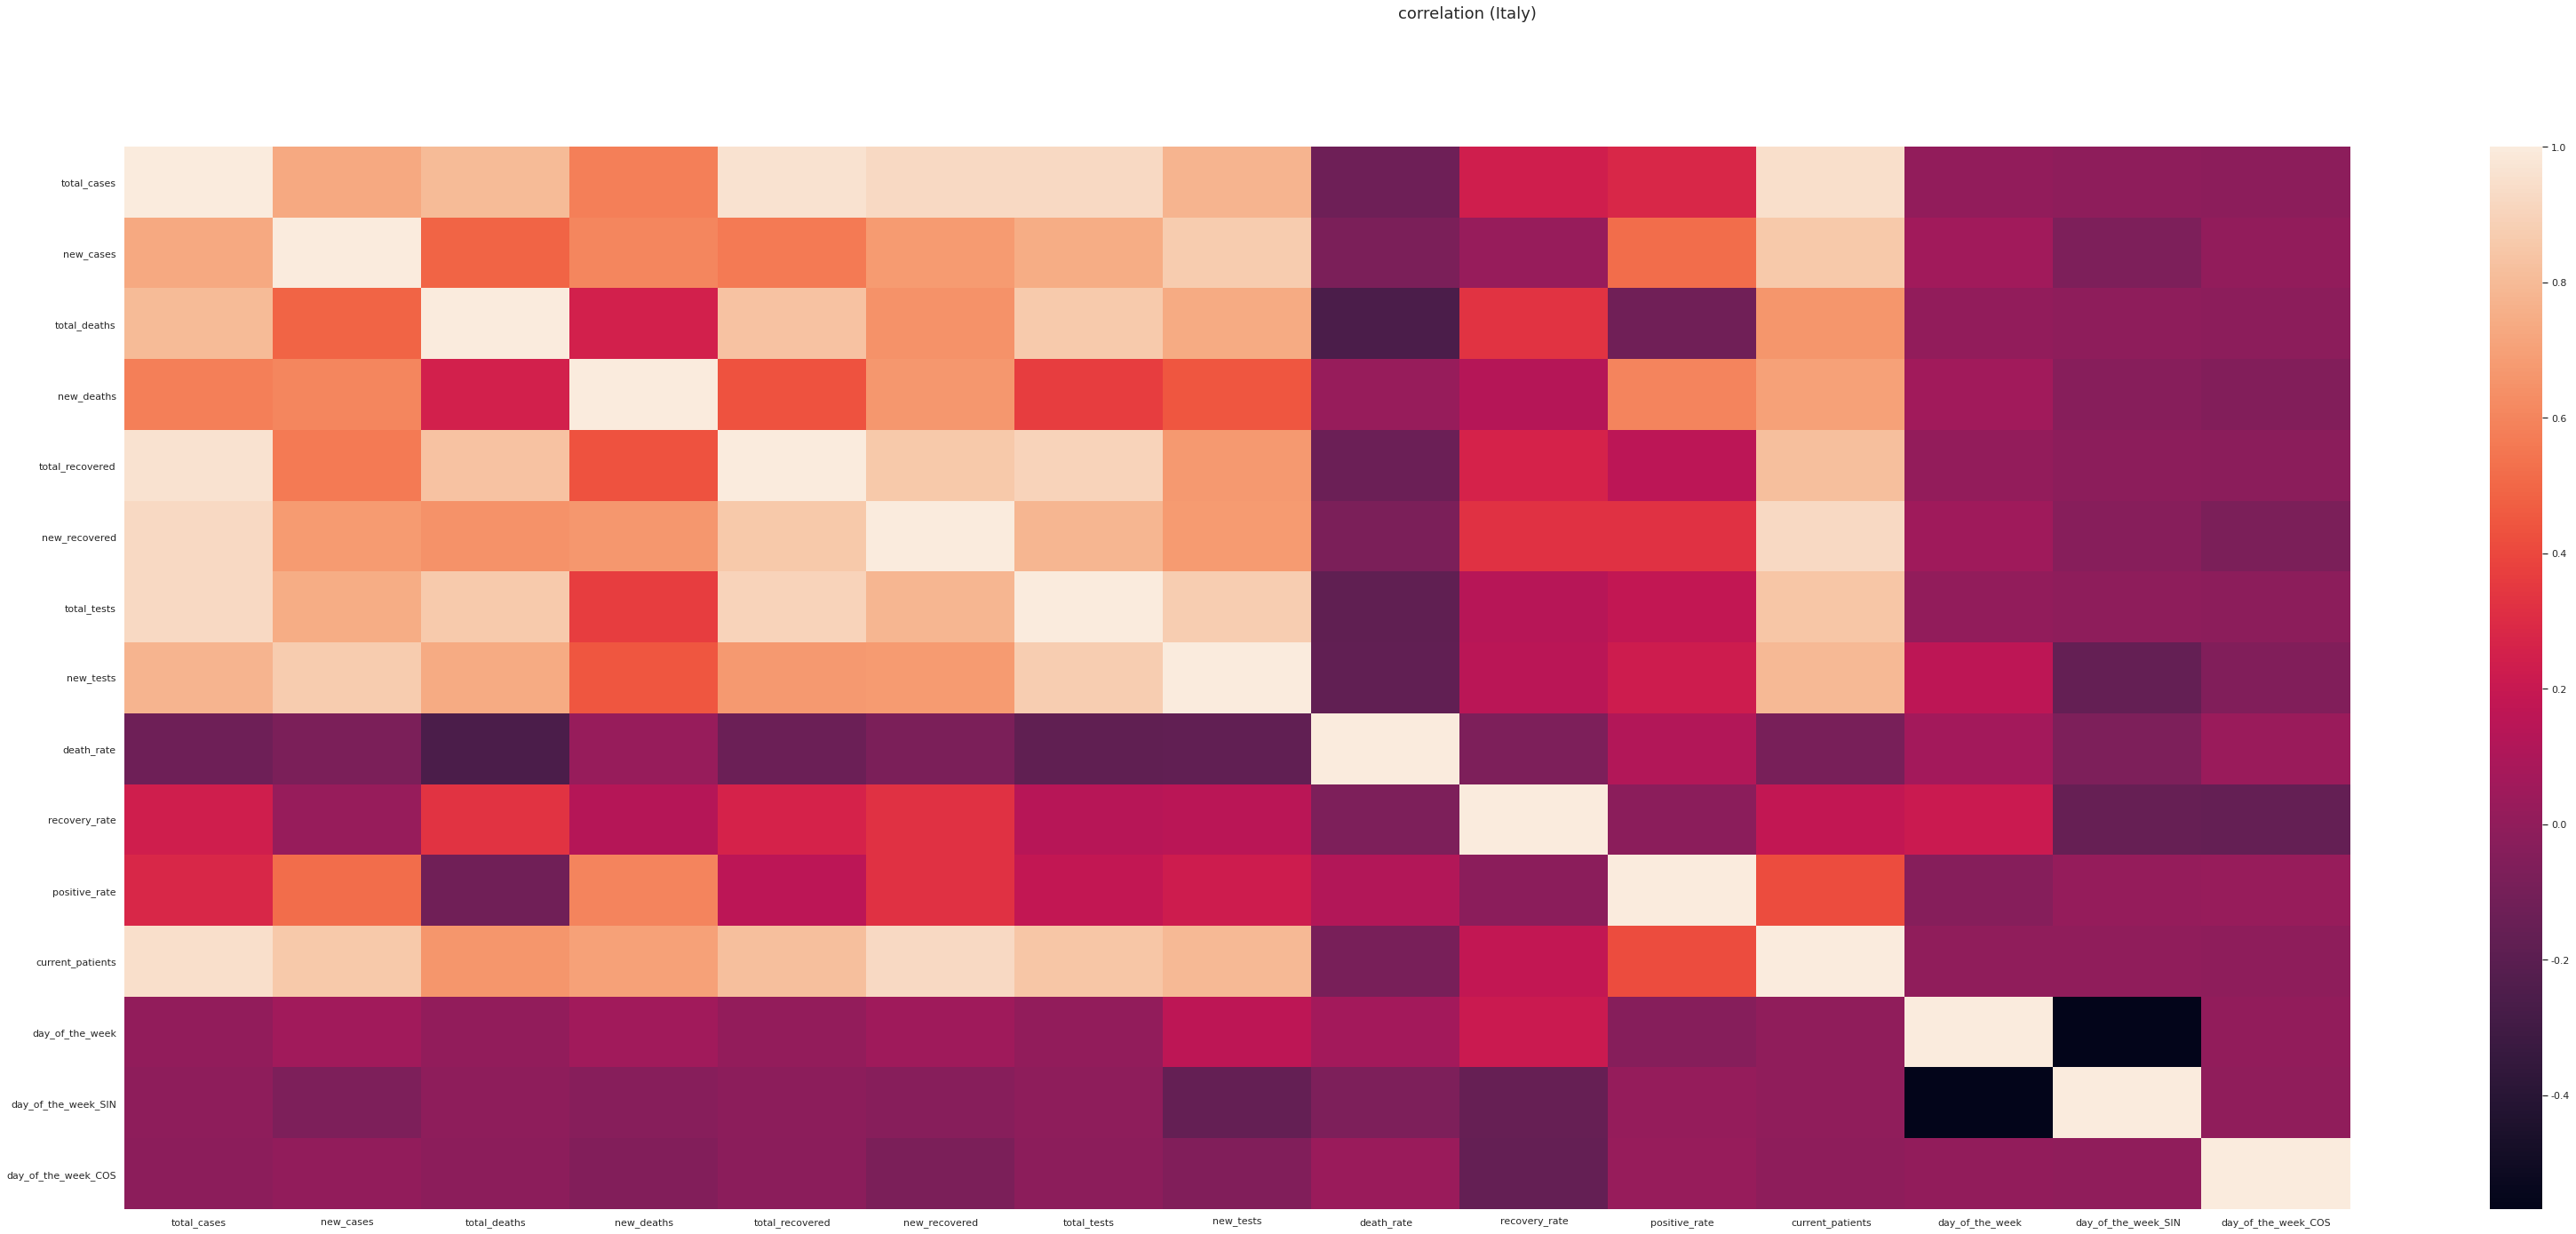

<AxesSubplot:>

Text(0.5, 0.98, 'correlation (Russia)')

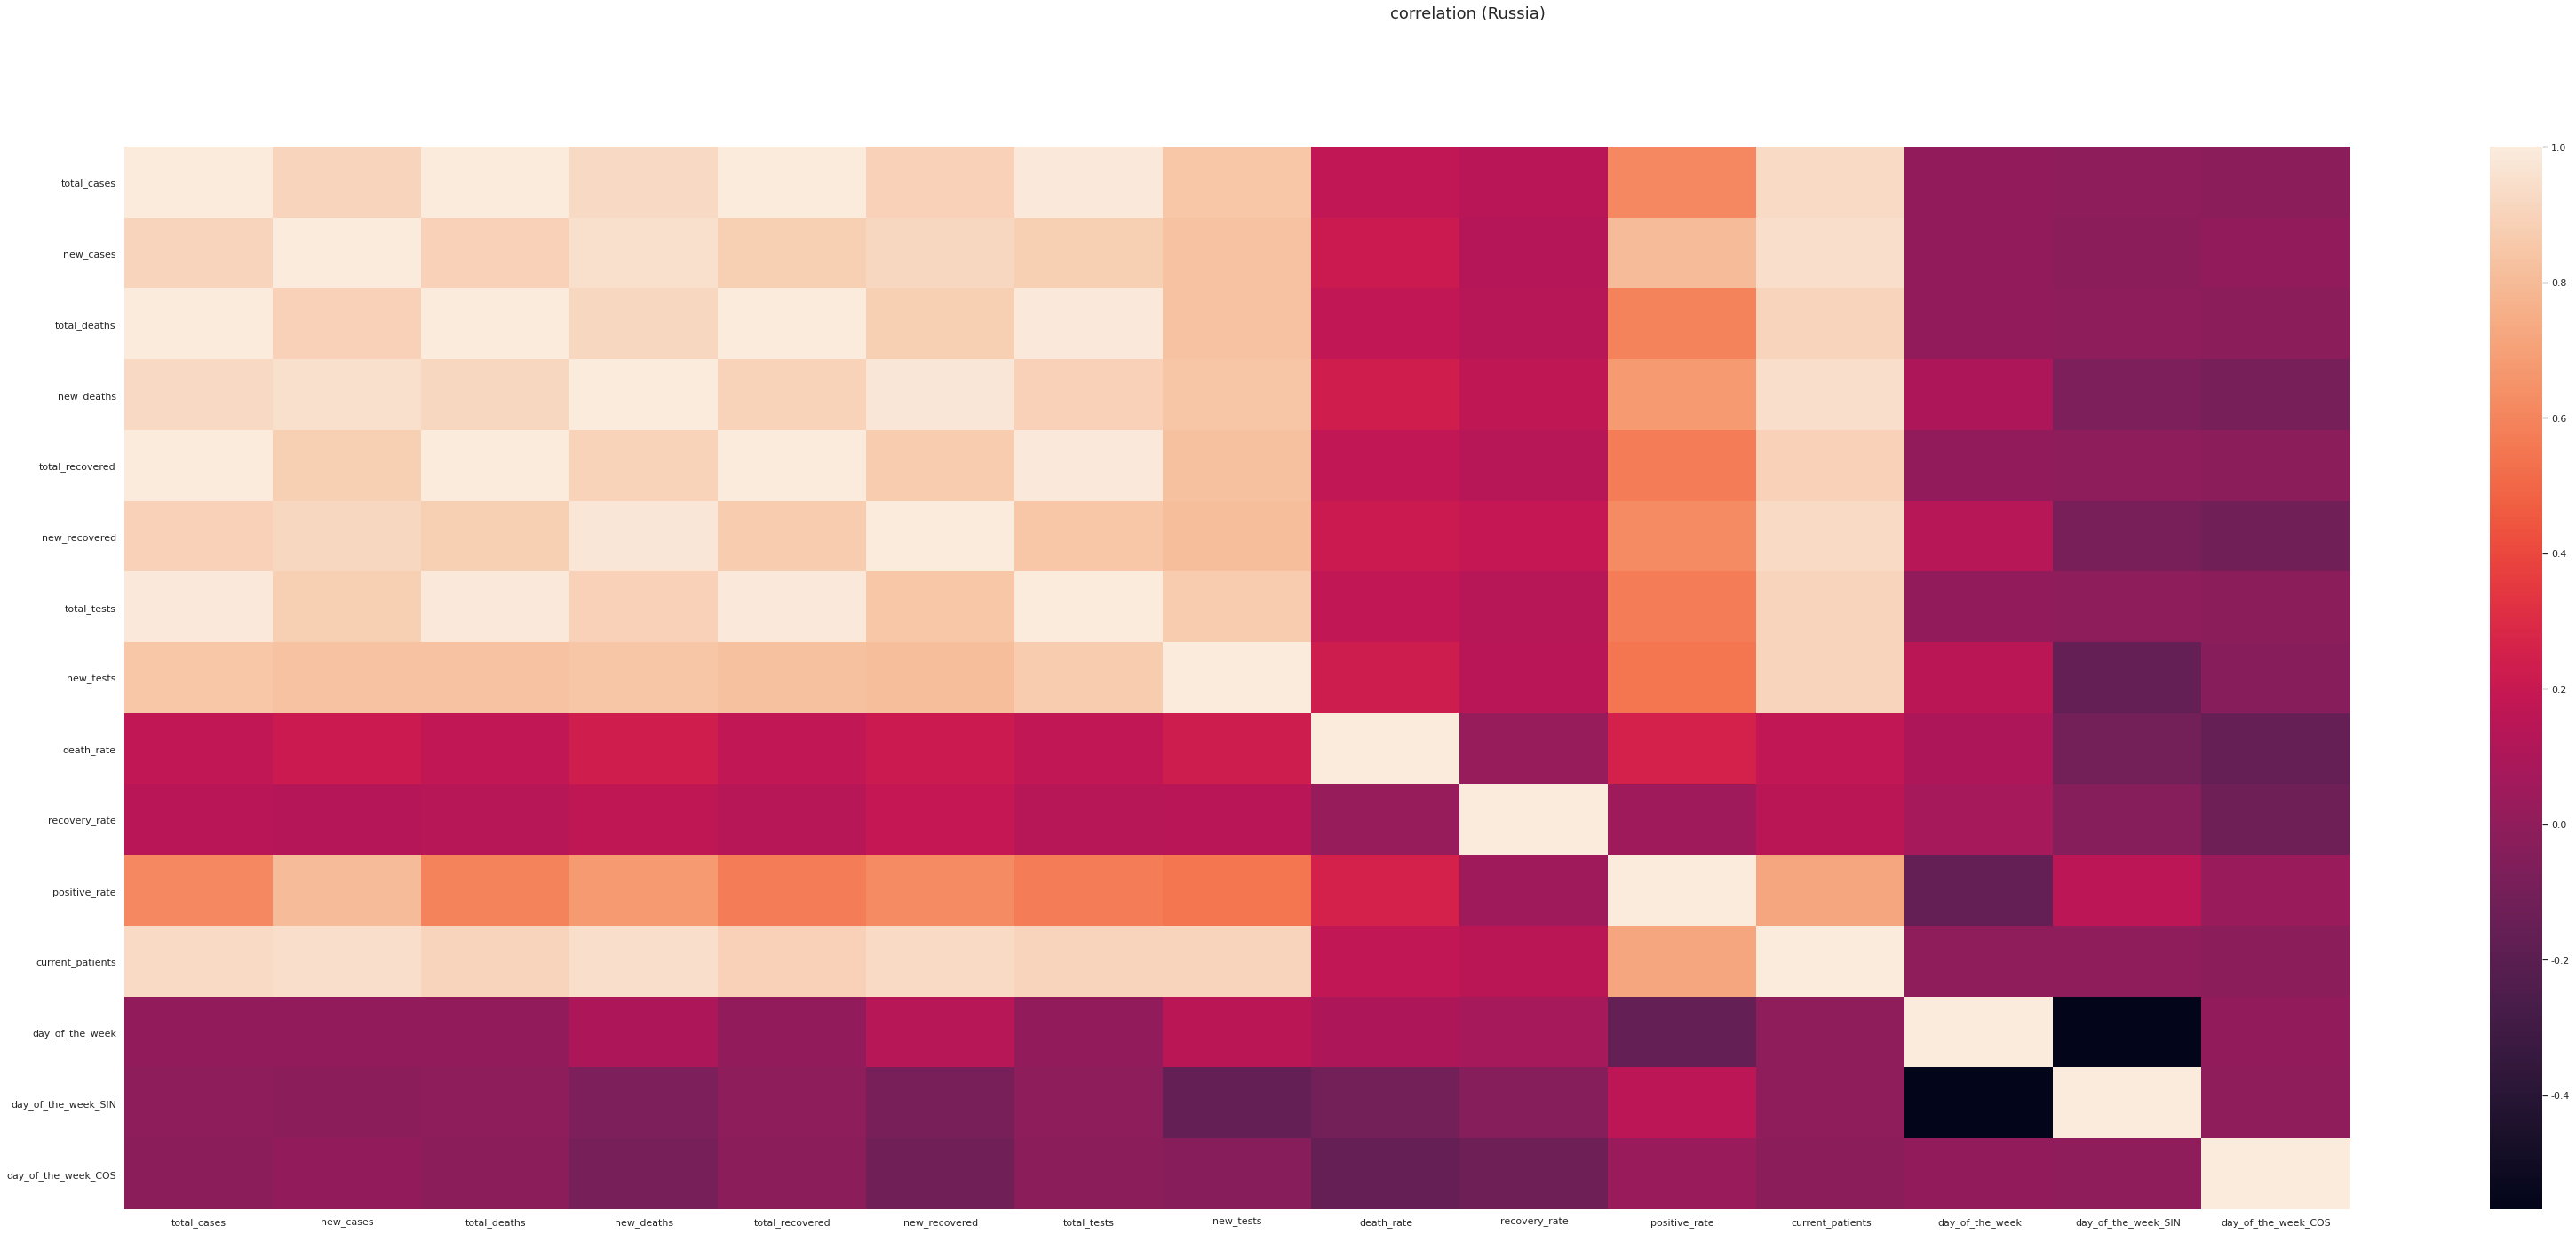

<AxesSubplot:>

Text(0.5, 0.98, 'correlation (Denmark)')

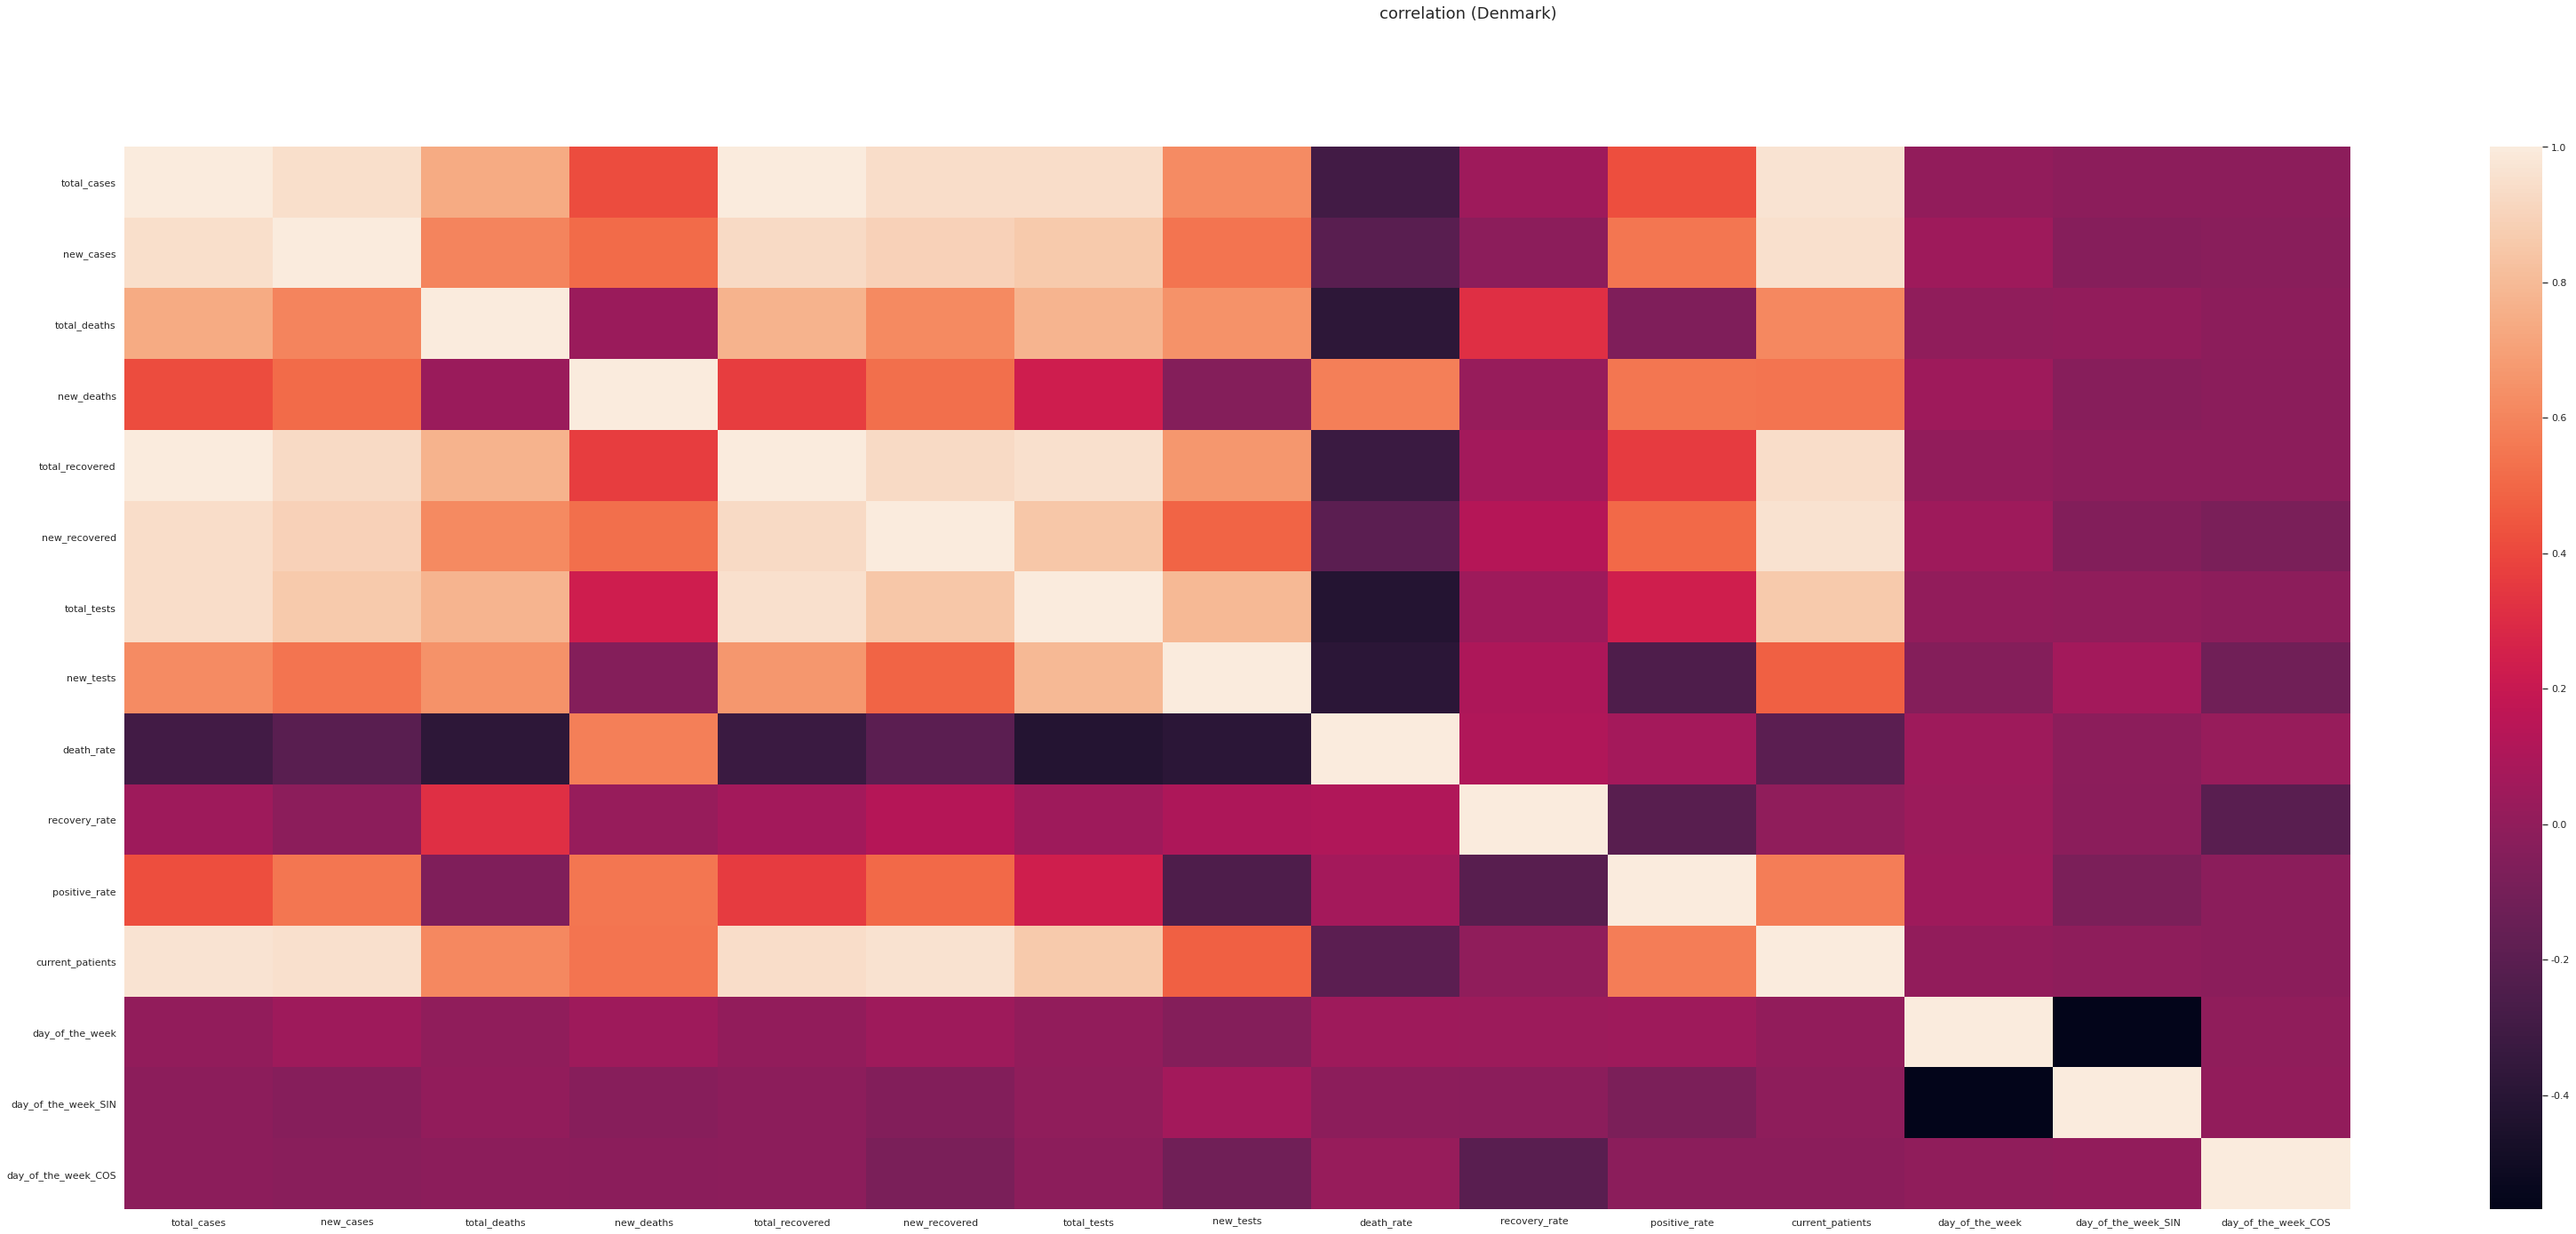

<AxesSubplot:>

Text(0.5, 0.98, 'correlation (Switzerland)')

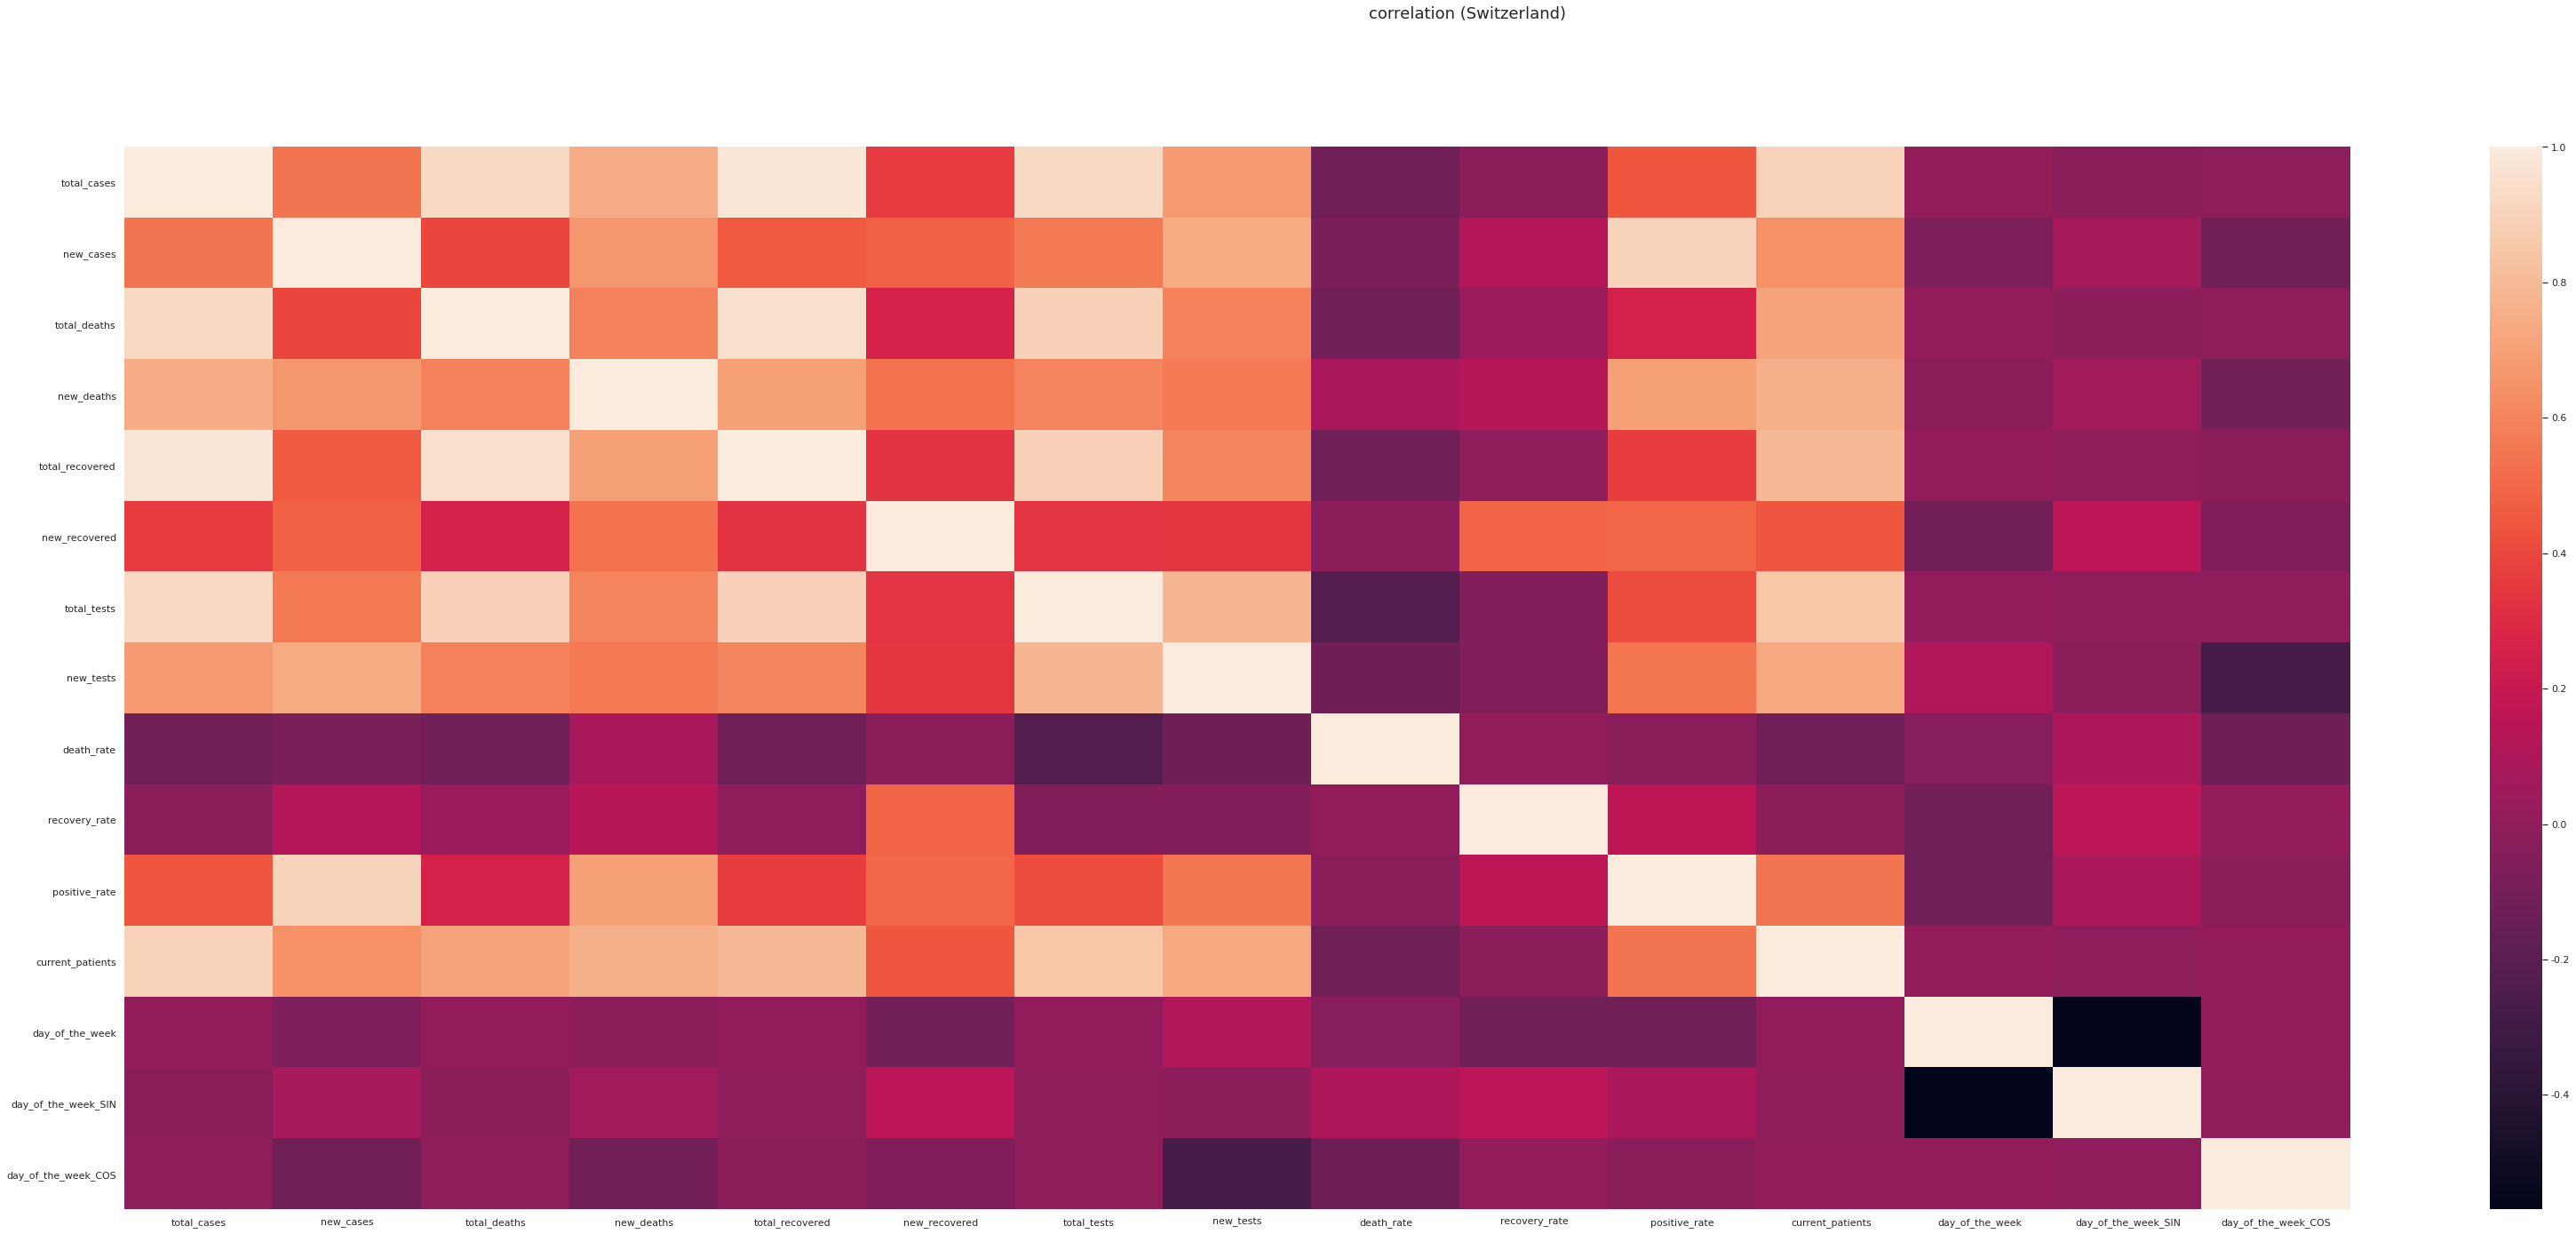

In [62]:
for country in dl.interested_countries:
    ori_data = dl.countries_data[country]
    sns.heatmap(ori_data.drop(columns=['date', 'day_of_the_week_str']).corr())
    # sns.clustermap(ori_data.drop(columns=['date', 'weekday']).corr())
    plt.suptitle('correlation ({})'.format(country), fontsize=18)
    plt.savefig('{}correlation ({}).png'.format(img_path, country))
    plt.show()

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'total_cases')

Text(0.5, 0.98, 'total_cases')

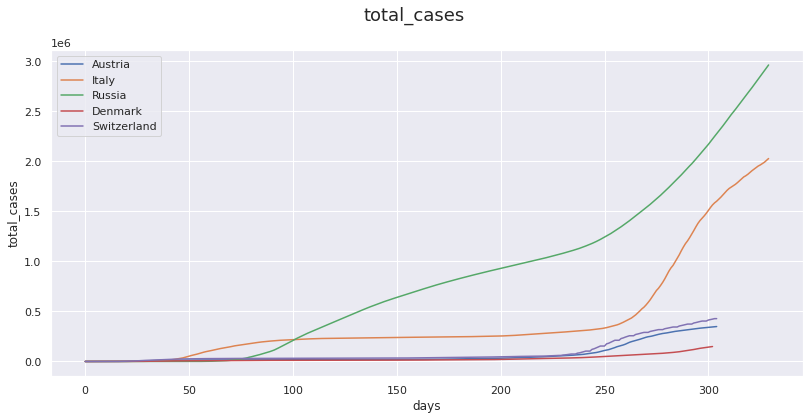

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'new_cases')

Text(0.5, 0.98, 'new_cases')

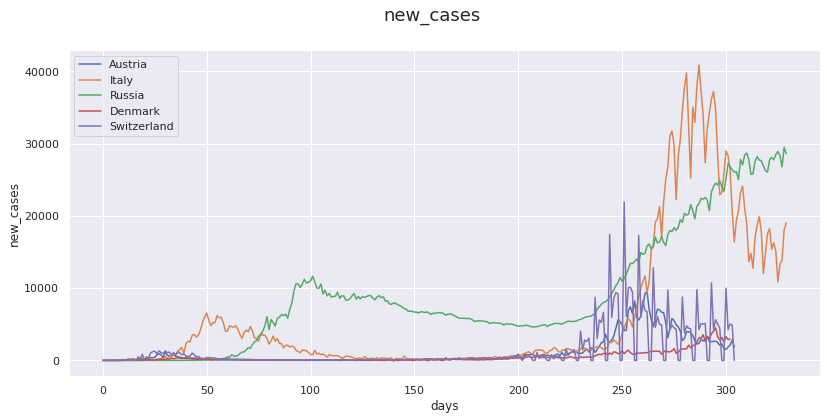

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'total_deaths')

Text(0.5, 0.98, 'total_deaths')

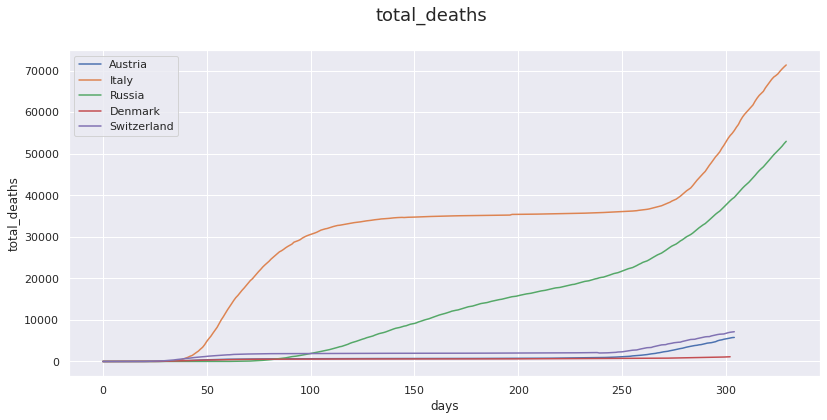

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'new_deaths')

Text(0.5, 0.98, 'new_deaths')

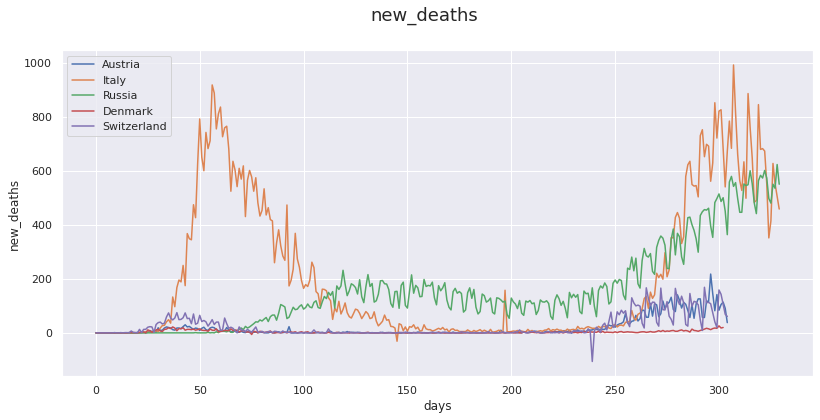

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'total_recovered')

Text(0.5, 0.98, 'total_recovered')

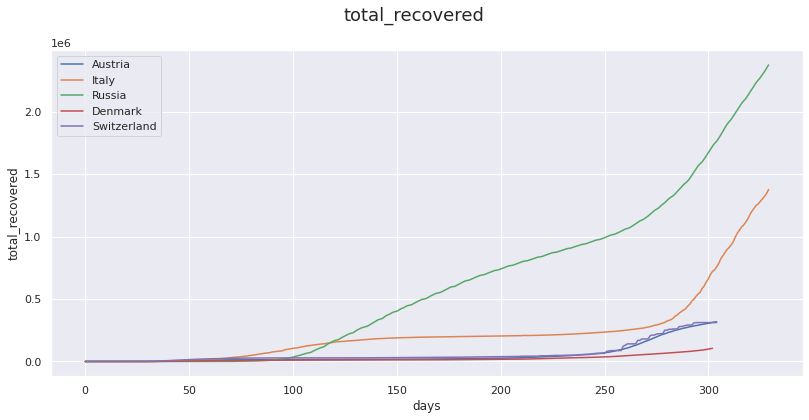

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'new_recovered')

Text(0.5, 0.98, 'new_recovered')

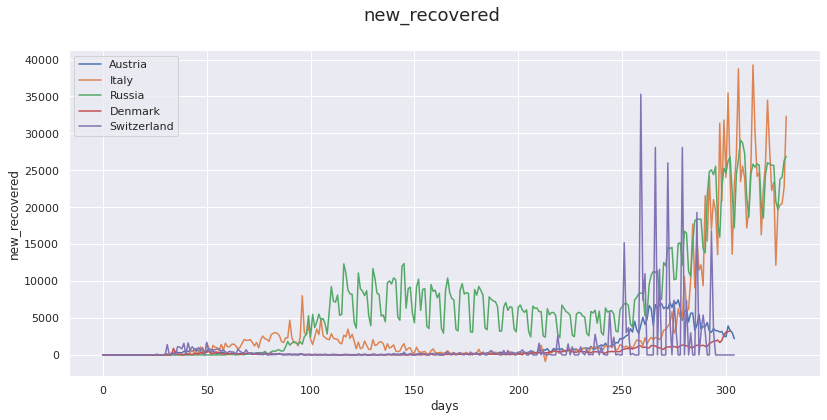

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'total_tests')

Text(0.5, 0.98, 'total_tests')

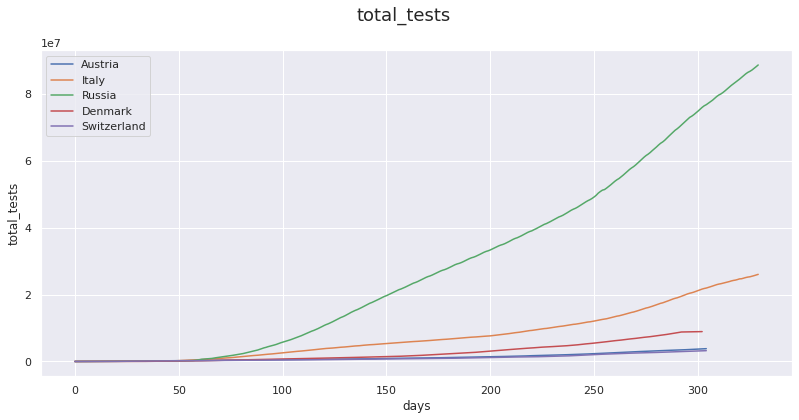

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'new_tests')

Text(0.5, 0.98, 'new_tests')

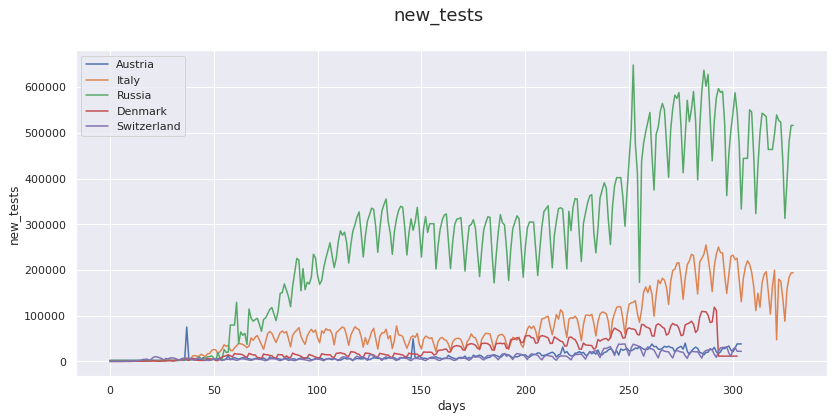

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'death_rate')

Text(0.5, 0.98, 'death_rate')

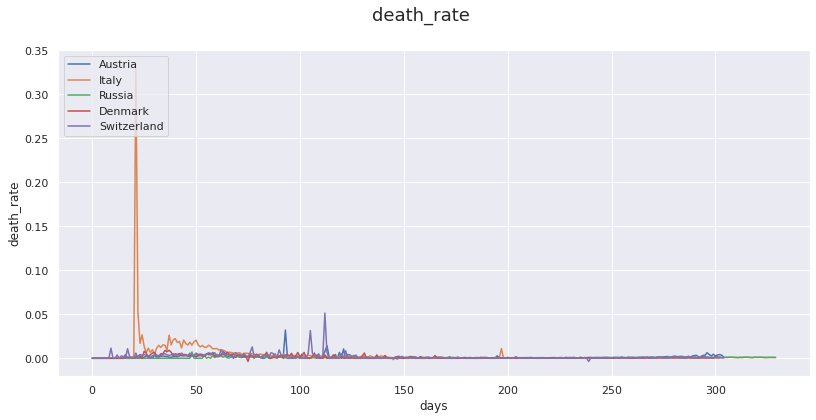

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'recovery_rate')

Text(0.5, 0.98, 'recovery_rate')

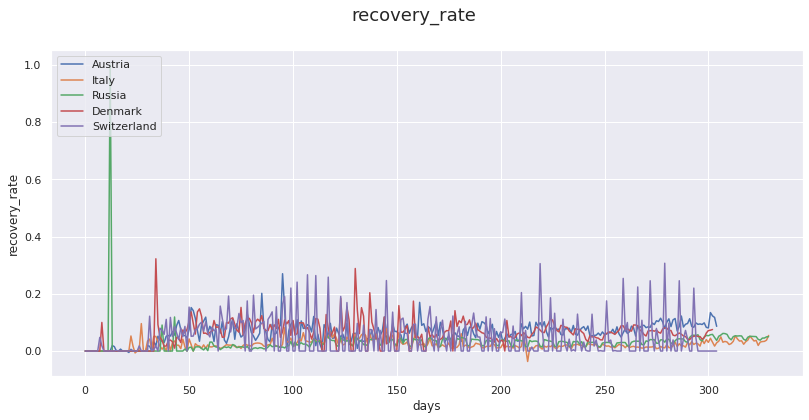

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'positive_rate')

Text(0.5, 0.98, 'positive_rate')

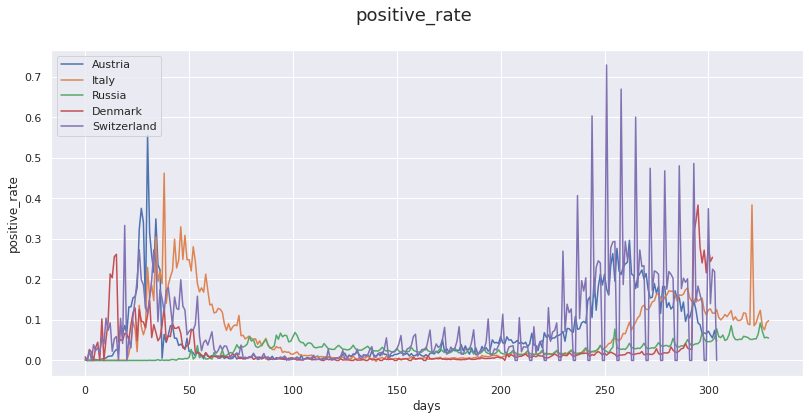

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'current_patients')

Text(0.5, 0.98, 'current_patients')

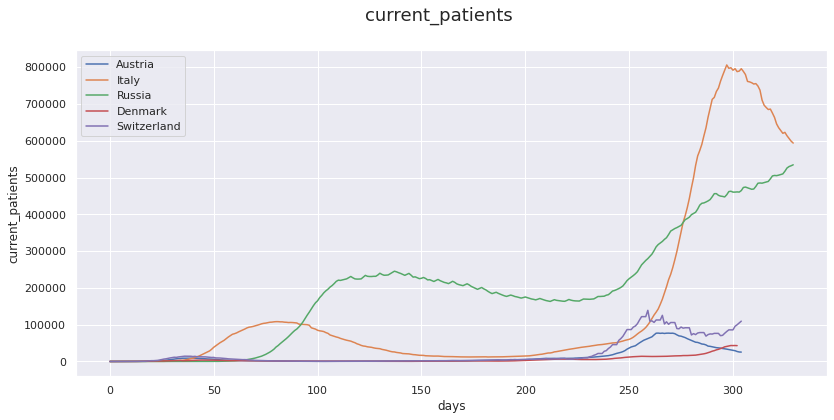

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'day_of_the_week_SIN')

Text(0.5, 0.98, 'day_of_the_week_SIN')

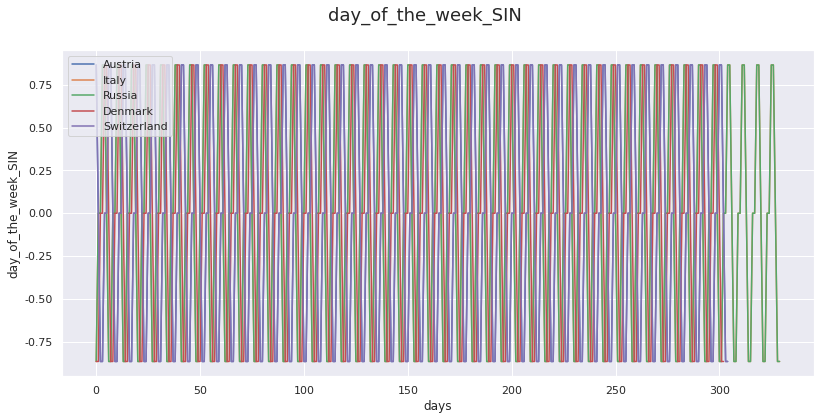

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'day_of_the_week_COS')

Text(0.5, 0.98, 'day_of_the_week_COS')

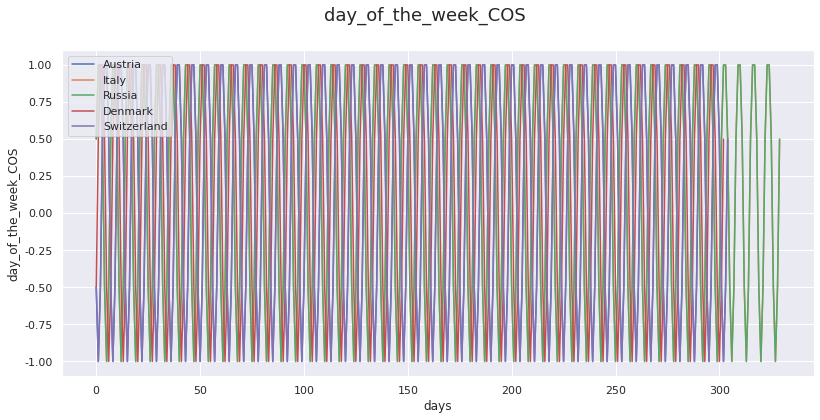

In [63]:
print_columns = dl.countries_data['Russia'].columns.values.tolist()
print_columns.remove('date')
print_columns.remove('day_of_the_week')
print_columns.remove('day_of_the_week_str')

for col in print_columns:
    plt.figure(figsize=(12,6))
    plt_list = []
    for country in dl.interested_countries:
        plt_list.append(plt.plot(dl.countries_data[country][[col]]))
    plt.legend(dl.interested_countries, loc='upper left')
    plt.xlabel('days')
    plt.ylabel(col)
    plt.suptitle(col, fontsize=18)
    plt.savefig('{}original_{}.png'.format(img_path, col))
    plt.show()


/tf/.anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'people')

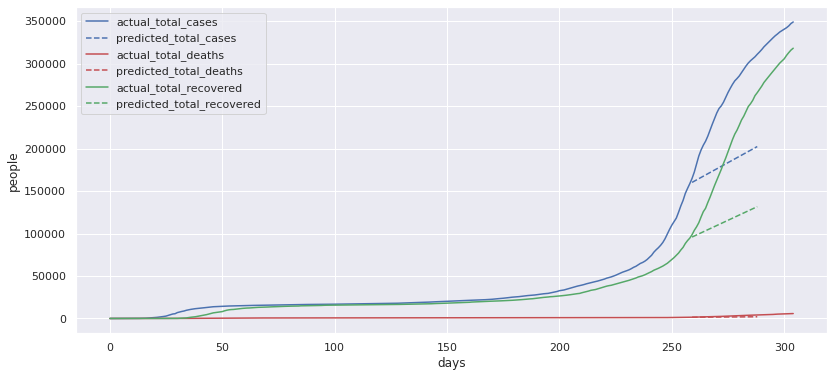

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'people')

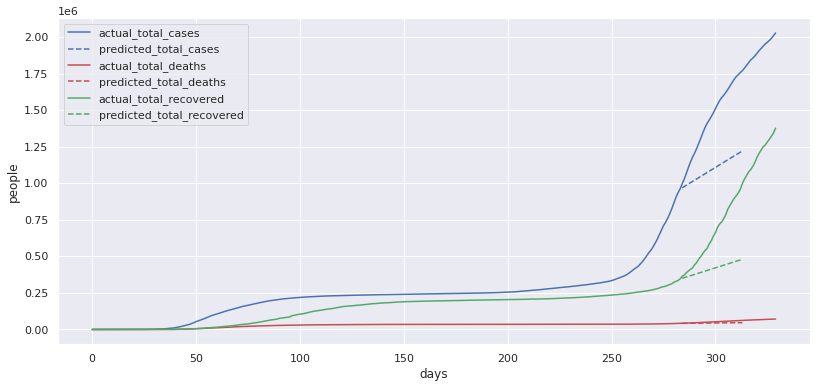

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'people')

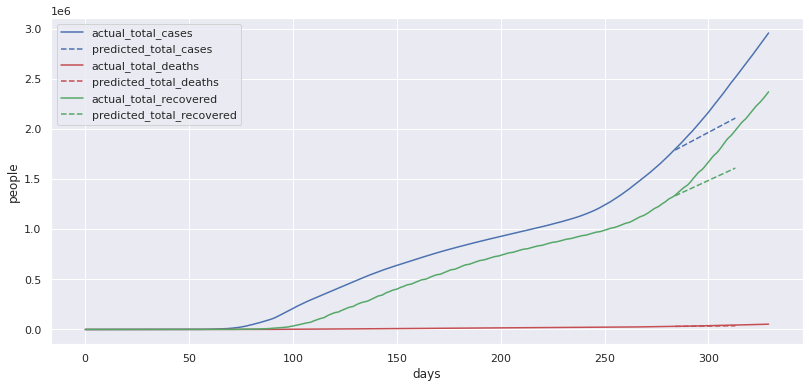

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'people')

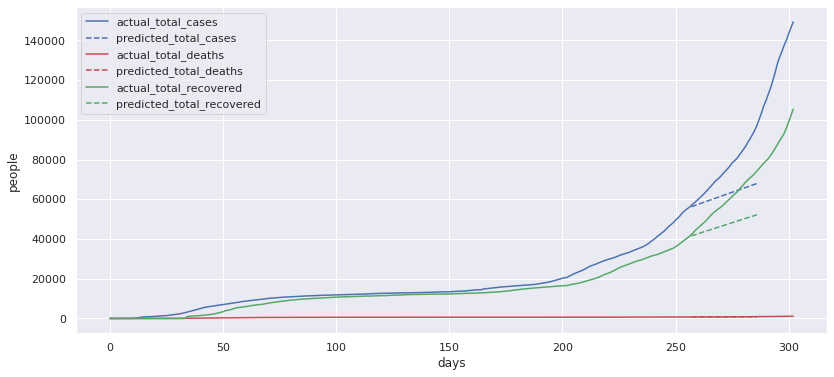

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'days')

Text(0, 0.5, 'people')

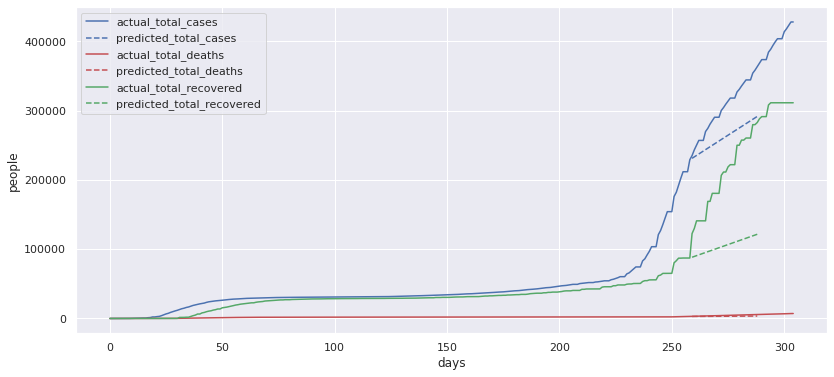

In [65]:
for country in dl.interested_countries:
    plt.figure(figsize=(12 ,6))
    plt_list = []

    plt_list.append(plt.plot(dl.countries_data[country]['total_cases'], color='b'))
    plt_list.append(plt.plot(countries_results[country]['total_cases'], color='b', linestyle='--'))
    plt_list.append(plt.plot(dl.countries_data[country]['total_deaths'], color='r'))
    plt_list.append(plt.plot(countries_results[country]['total_deaths'], color='r', linestyle='--'))
    plt_list.append(plt.plot(dl.countries_data[country]['total_recovered'], color='g'))
    plt_list.append(plt.plot(countries_results[country]['total_recovered'], color='g', linestyle='--'))

    plt.legend(['actual_total_cases','predicted_total_cases', 'actual_total_deaths', 'predicted_total_deaths', 'actual_total_recovered', 'predicted_total_recovered'], loc='upper left')

    plt.xlabel('days')
    plt.ylabel('people')

    plt.savefig('{}result ({}).png'.format(img_path, country))

    plt.show()